In [148]:
#Importing the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings


"""read the data into dataframe"""

news_data = pd.read_csv('OnlineNewsPopularity.csv')

"""review the data types of the dataset fields"""

news_data.info()

"""check the number of rows and columns of the imported dataset"""

news_data.shape

"""Generate descriptive statistics that summarize count,mean,std"""

news_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
timedelta                         39644 non-null float64
n_tokens_title                    39644 non-null float64
n_tokens_content                  39644 non-null float64
n_unique_tokens                   39644 non-null float64
n_non_stop_words                  39644 non-null float64
n_non_stop_unique_tokens          39644 non-null float64
num_hrefs                         39644 non-null float64
num_self_hrefs                    39644 non-null float64
num_imgs                          39644 non-null float64
num_videos                        39644 non-null float64
average_token_length              39644 non-null float64
num_keywords                      39644 non-null float64
data_channel_is_lifestyle         39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus               396

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


Dataframe shape after removing outliers values : (39336, 61)


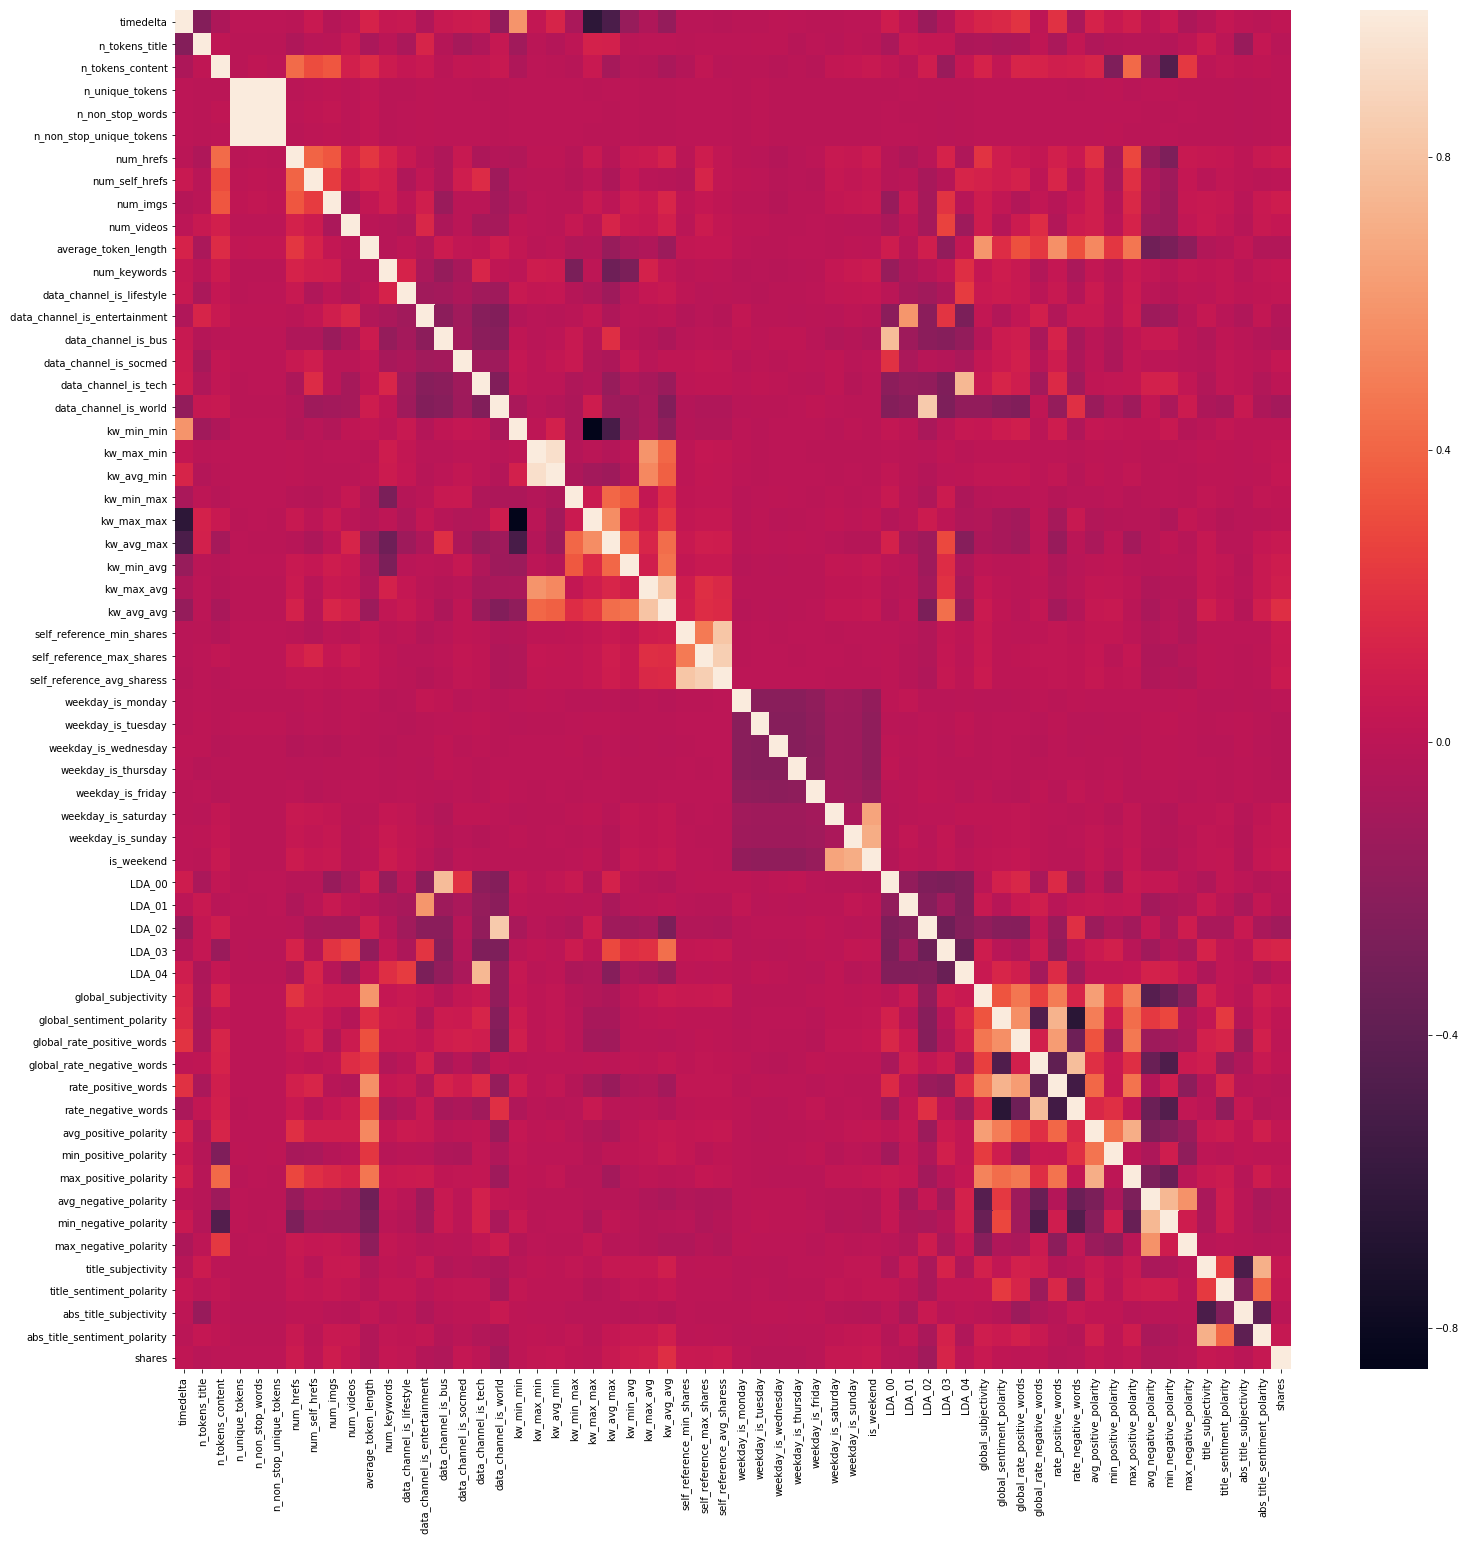

In [141]:
"""Remove the outliers from the data using standard deviation method. 
We will use the practice of removing outliers from the data by eliminating the values
which falls outside 3 standard deviations from the mean of the data """

shares_mean = news_data['shares'].mean()
shares_std = news_data['shares'].std()

"""Identify the upper and lower outlier limit"""

outlier_limit = shares_std * 3
lower_limit = shares_mean - outlier_limit
upper_limit = shares_mean + outlier_limit



"""Ignore lower limit which is in negative value as the number of shares cannot be negative. 
Filter the news_data dataframe and remove records which have number of shares greater than the upper outlier limit 38276"""

updated_news_data = news_data[news_data['shares'] < 38276]
print("Dataframe shape after removing outliers values : {0}".format(updated_news_data.shape))

"""Compute correlation matrix to see highly correlated variables""" 

correlation_matrix = updated_news_data.corr()
plt.subplots(figsize=(25, 25))
sns.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns.values,yticklabels=correlation_matrix.columns.values)
plt.show()

shares                            1.000000
kw_avg_avg                        0.185028
LDA_03                            0.129555
kw_max_avg                        0.099328
kw_min_avg                        0.079722
num_imgs                          0.078938
num_hrefs                         0.077703
self_reference_avg_sharess        0.066709
is_weekend                        0.063794
self_reference_min_shares         0.058671
global_subjectivity               0.058322
kw_avg_max                        0.055554
self_reference_max_shares         0.053692
abs_title_sentiment_polarity      0.046615
title_subjectivity                0.046501
weekday_is_sunday                 0.043577
weekday_is_saturday               0.043454
data_channel_is_socmed            0.040091
num_keywords                      0.039355
kw_avg_min                        0.035637
num_videos                        0.035215
title_sentiment_polarity          0.031995
kw_max_min                        0.031914
avg_positiv

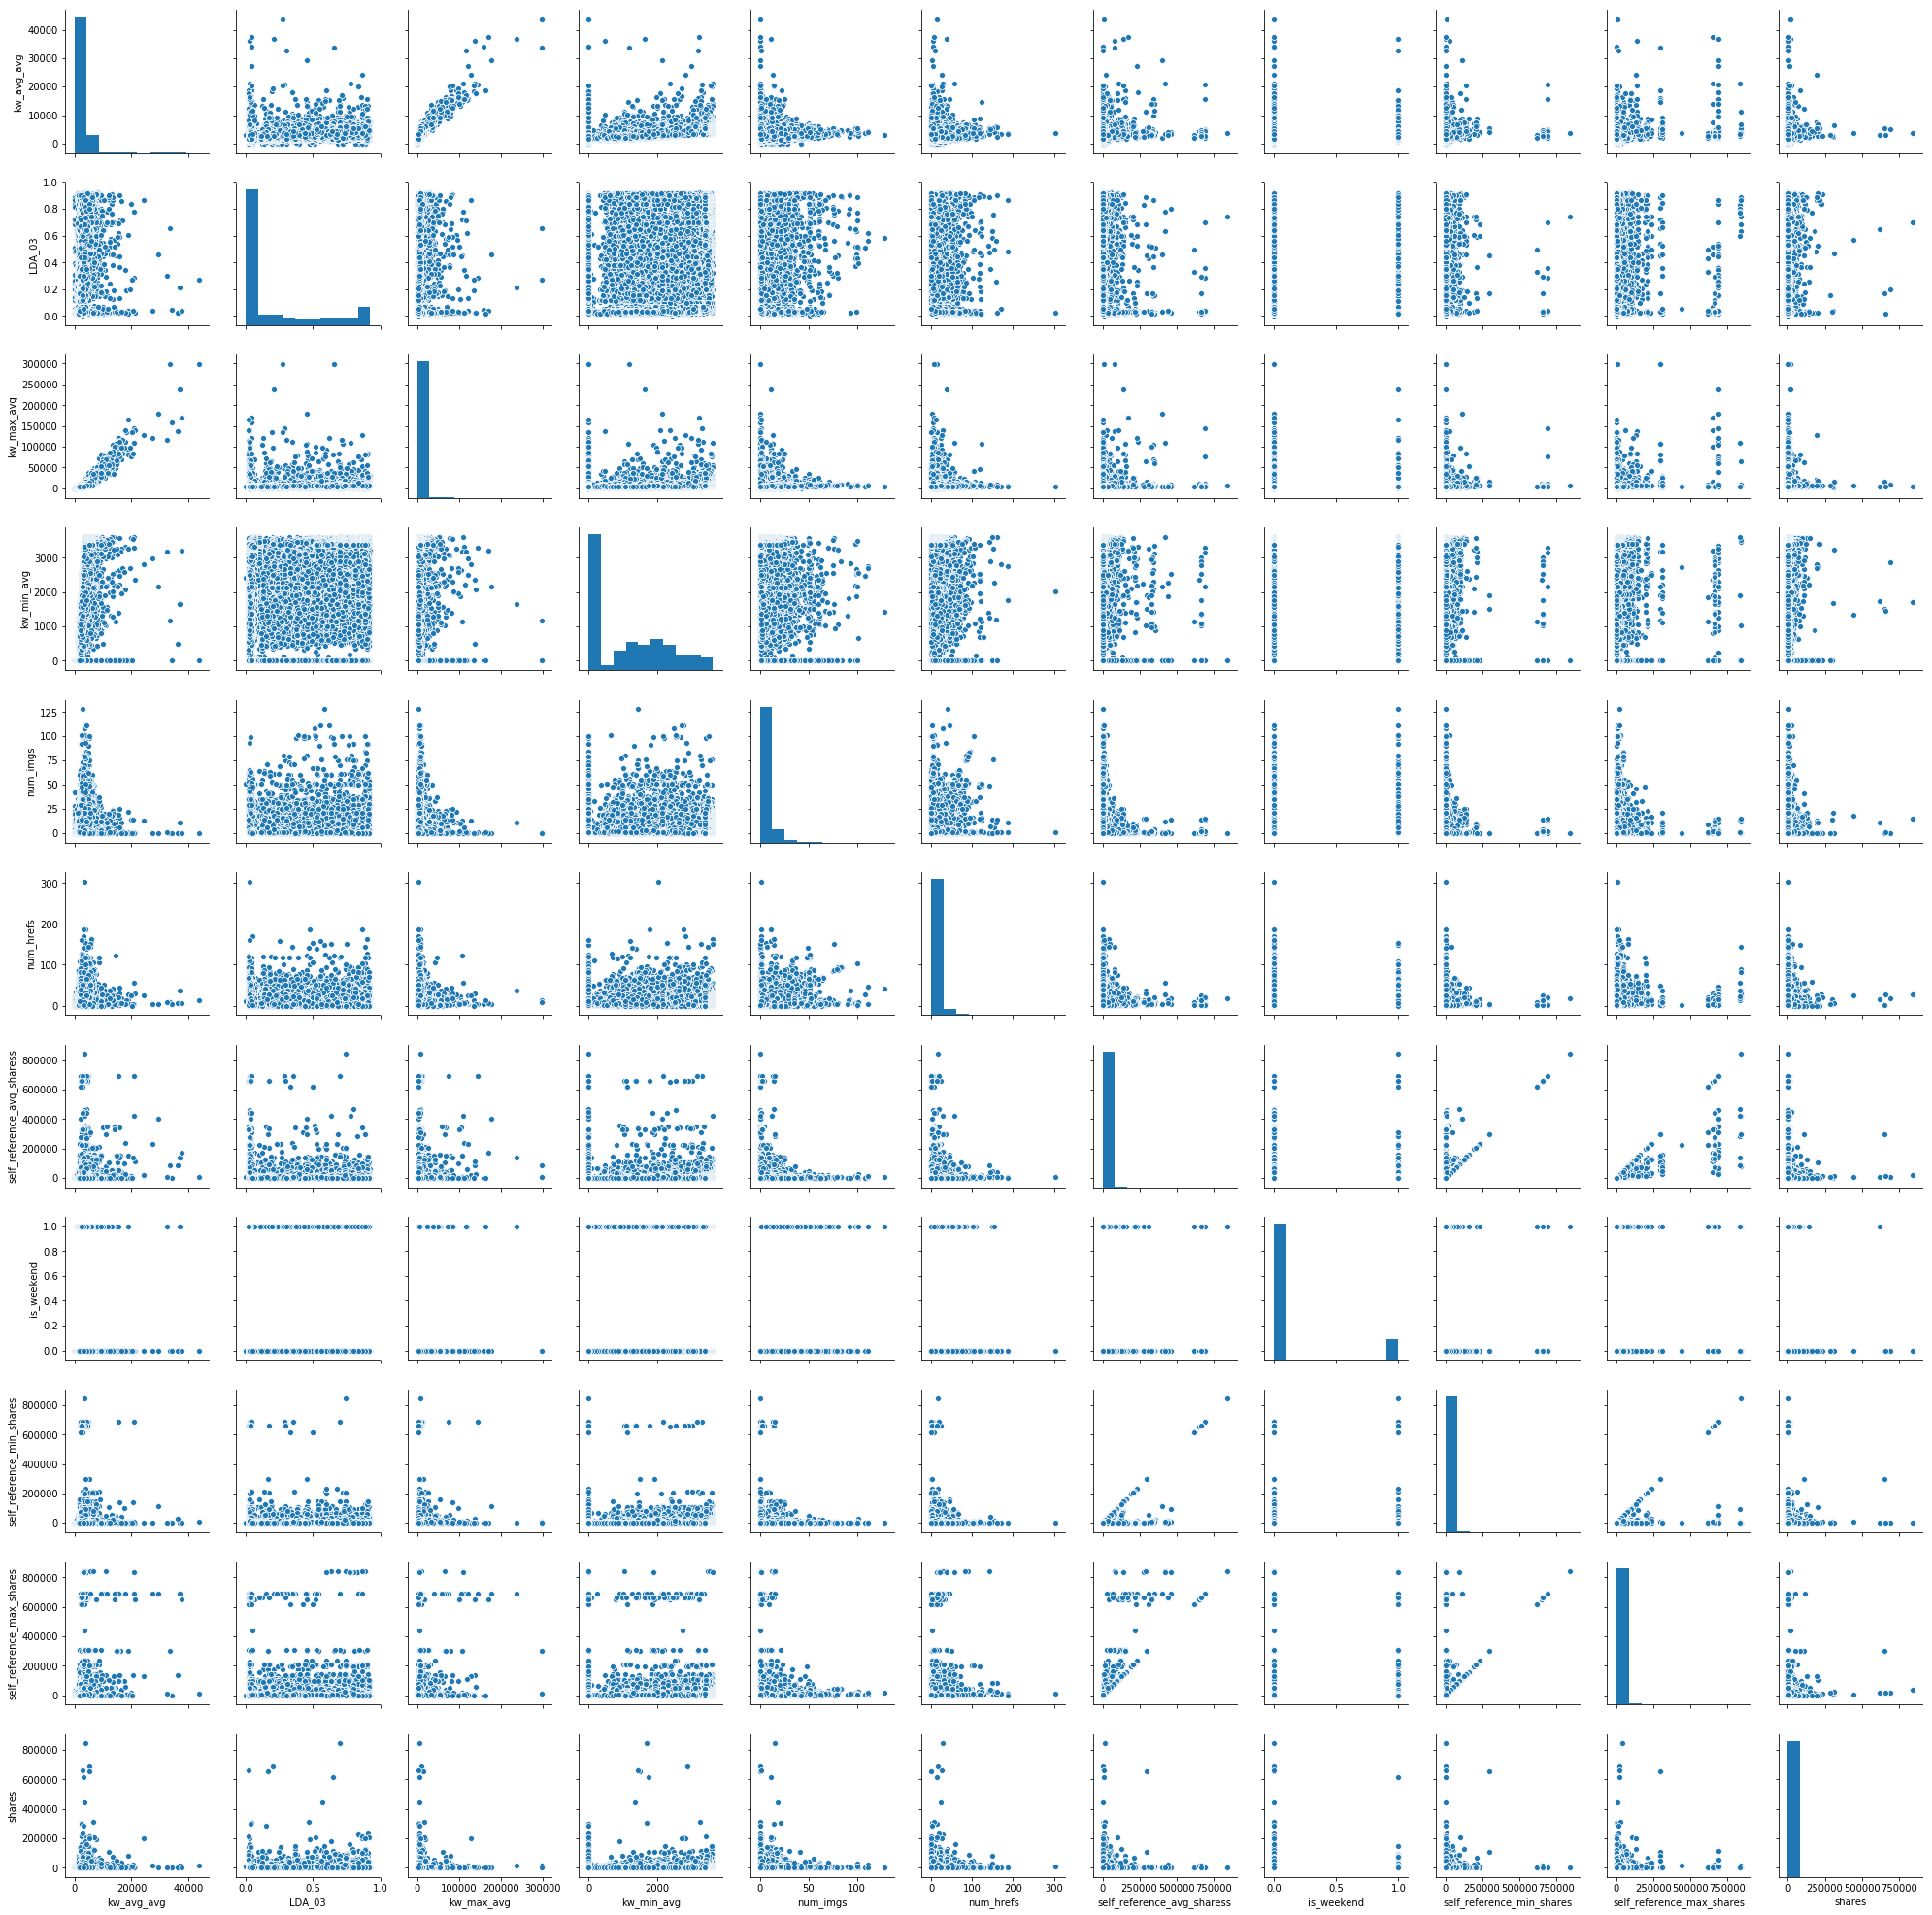

In [142]:
"""Plot correlation matrix of top 10 highly correlated variables""" 

print(correlation_matrix['shares'].sort_values(ascending=False))

#List of top 10 highly correlated variables 
news_data_attributes = ['kw_avg_avg','LDA_03','kw_max_avg','kw_min_avg','num_imgs','num_hrefs','self_reference_avg_sharess','is_weekend','self_reference_min_shares','self_reference_max_shares','shares']
sns.pairplot(news_data[news_data_attributes])
plt.show()

In [1]:
"""Split the data into train test sets""" 

X = updated_news_data.iloc[:,1:60]  #features 
y = updated_news_data.iloc[:,60:]   #target variable 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

""" Compute linear regression model to predict values of target variable """ 

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train,y_train)
y_pred = linear_reg_model.predict(X_train)

""" Compute linear model metrics : Root mean squared error, Mean absolute error """

linear_model_mse = mean_squared_error(y_train,y_pred)
linear_rmse = np.sqrt(linear_model_mse)
linear_model_mae = mean_absolute_error(y_train,y_pred)

print("The root mean squared error metric for the linear model is :%s"%(linear_rmse))
print("The mean absolute error metric for the linear model is :%s"%(linear_model_mae))

NameError: name 'updated_news_data' is not defined

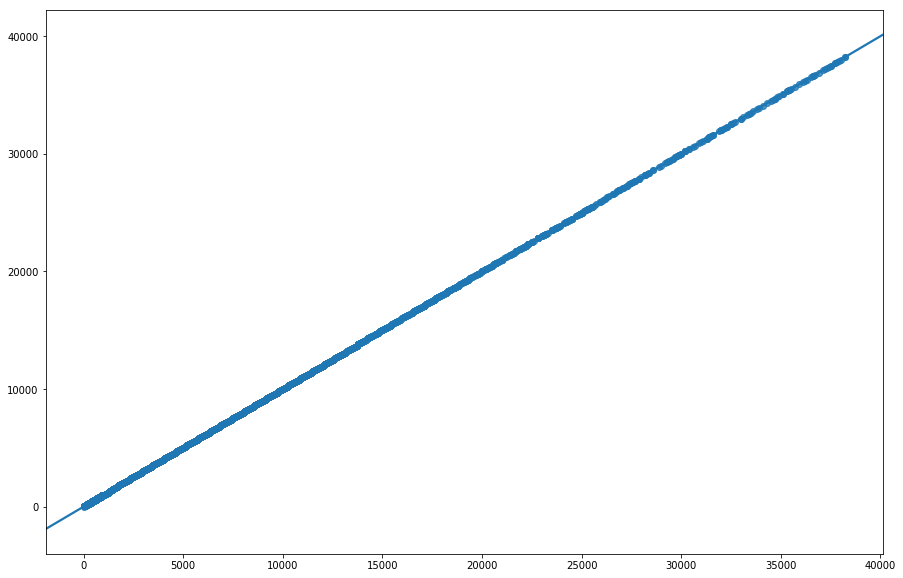

In [133]:
""" Compute scatter plot between actual values vs predicted values """

plt.subplots(figsize=(15,10))
sns.regplot(x=y_train, y=y_pred)
plt.show()

In [144]:
""" Compute decision tree regression model to predict values of target variable """ 

decision_tree = DecisionTreeRegressor(random_state=10)

decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_train)

""" Compute decision tree model metrics : Root mean squared error, Mean absolute error """

decision_tree_mse = mean_squared_error(y_train,y_pred)
decision_tree_rmse = np.sqrt(decision_tree_mse)
decision_tree_mae = mean_absolute_error(y_train,y_pred)

print("The root mean squared error metric for the decision tree model is :%s"%(decision_tree_rmse))
print("The mean absolute error metric for the decision tree model is :%s"%(decision_tree_mae))

The root mean squared error metric for the decision tree model is :0.0
The mean absolute error metric for the decision tree model is :0.0


In [150]:
""" Compute random forest regression model to predict values of target variable """ 

random_forest_model = RandomForestRegressor(random_state=10)
warnings.filterwarnings('ignore')
random_forest_model.fit(X_train,y_train)
y_pred = random_forest_model.predict(X_train)


""" Compute random forest model metrics : Root mean squared error, Mean absolute error """

random_forest_mse = mean_squared_error(y_train,y_pred)
rmse = np.sqrt(random_forest_mse)
random_forest_mae = mean_absolute_error(y_train,y_pred)

print("The root mean squared error metric for the random tree model is :%s"%(rmse))
print("The mean absolute error metric for the random tree model is :%s"%(random_forest_mae))

The root mean squared error metric for the decision tree model is :1738.129084381155
The mean absolute error metric for the decision tree model is :924.333731614309


In [152]:
"""Perform randomized search CV to find optimal parameters"""

random_forest_model = RandomForestRegressor(random_state=10)

param_dist = {"max_depth": [3, 5],
              "max_features": randint(1, 11),
              "min_samples_split": randint(2, 11),
              "min_samples_leaf": randint(1, 11),
              "bootstrap": [True, False]
             }

random_search = RandomizedSearchCV(random_forest_model, param_distributions=param_dist,n_iter=10)
warnings.filterwarnings('ignore')
random_search.fit(X_train,y_train)

"""Perform random forest model prediction using the best estimator instance from random search object"""
random_model = random_search.best_estimator_
y_pred = random_model.predict(X_train)

random_model_mse = mean_squared_error(y_train,y_pred)
rmse = np.sqrt(random_model_mse)
random_model_mae = mean_absolute_error(y_train,y_pred)

print("The root mean squared error metric for the randomized CV random forest model is :%s"%(rmse))
print("The mean absolute error metric for the randomized CV random forest model is :%s"%(random_model_mae))

The root mean squared error metric for the randomized CV random forest model is :3791.756114701649
The mean absolute error metric for the randomized CV random forest model is :2090.500047210957
